In [113]:
#Summary 
# 1) The graph 'Tumor Response to Treatment' shows that the drug Capomulin had the best result as compared to the other drugs. While taking Capomulin, the tumor volume shrunk over the course of the treatment. 
# 2) The graph 'Metastic Spread During Treatment' shows that the Placebo drug had the fastest metastic spread while Capomulin was the slowest. 
# 3) The graph 'Survival During Treatment' shows that  the mice that were taking Capomulin had a survival rate over 80% whereas the survival rate dropped below 80% after twenty days of treatment for mice taking Infubinol, Placebo, and Ketapril.   




# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os
import matplotlib.patches as mpatches


# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

# File to Load (Remember to Change These)
mouse_drug_data = "data/mouse_drug_data.csv"
clinical_trial_data = "data/clinicaltrial_data.csv"

# Read the Mouse and Drug Data and the Clinical Trial Data
mouse_df = pd.read_csv(mouse_drug_data)
ct_df = pd.read_csv(clinical_trial_data)

# Combine the data into a single dataset
merge_df = pd.merge(ct_df, mouse_df, on = 'Mouse ID', how='outer')

# Display the data table for preview
merge_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug
0,b128,0,45.000000,0,Capomulin
1,b128,5,45.651331,0,Capomulin
2,b128,10,43.270852,0,Capomulin
3,b128,15,43.784893,0,Capomulin
4,b128,20,42.731552,0,Capomulin


## Tumor Response to Treatment

In [114]:
# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint 
tumor_response = merge_df.groupby(['Drug','Timepoint'])['Tumor Volume (mm3)']
avg_tumor_df = tumor_response.mean()

# Convert to DataFrame
avg_tumor_df = avg_tumor_df.reset_index()

# Preview DataFrame
avg_tumor_df.head()

,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,45.000000
1,Capomulin,5,44.266086
2,Capomulin,10,43.084291
3,Capomulin,15,42.064317
4,Capomulin,20,40.716325


In [115]:
# Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint
tumor_standard_err = tumor_response.sem()

# Convert to DataFrame
tumor_standard_err_df = pd.DataFrame(tumor_standard_err)

# Preview DataFrame
tumor_standard_err_df.reset_index(inplace=True)
tumor_standard_err_df.head()


,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,0.000000
1,Capomulin,5,0.448593
2,Capomulin,10,0.702684
3,Capomulin,15,0.838617
4,Capomulin,20,0.909731


In [116]:
#Minor Data Munging to Re-Format the Data Frames
pivot_avg_tumor_df = avg_tumor_df.pivot(index='Timepoint',columns='Drug',values='Tumor Volume (mm3)')

# Preview that Reformatting worked
pivot_avg_tumor_df.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334


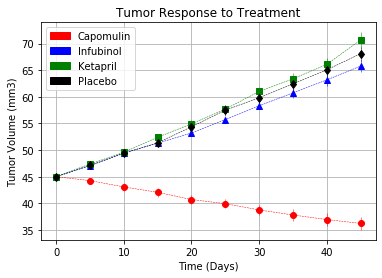

In [121]:
# Generate the Plot (with Error Bars)
drug_format_list = [('Capomulin','o','red'),('Infubinol','^','blue'),('Ketapril','s','green'),('Placebo','d','black')]
for drug,marker,colors in drug_format_list:
    ste = tumor_standard_err[drug]
    tumor_treatment_plt = plt.errorbar(pivot_avg_tumor_df.index,pivot_avg_tumor_df[drug],ste,
                                     fmt=marker,ls='--',color=colors,linewidth=0.5)  

red_patch = mpatches.Patch(color='red', label='Capomulin')
blue_patch = mpatches.Patch(color='blue', label='Infubinol')
green_patch = mpatches.Patch(color='green', label='Ketapril')
black_patch = mpatches.Patch(color='black', label='Placebo')

plt.legend(handles=[red_patch, blue_patch,green_patch, black_patch])
plt.title('Tumor Response to Treatment')
plt.xlabel('Time (Days)')
plt.ylabel('Tumor Volume (mm3)')
plt.grid()


# Save the Figure
plt.savefig(os.path.join('figures','tumor_response_to_treatment.png'))

![Tumor Response to Treatment](../Images/treatment.png)

## Metastatic Response to Treatment

In [79]:
# Store the Mean Met. Site Data Grouped by Drug and Timepoint 
grouped_met_df = merge_df.groupby(['Drug','Timepoint'])['Metastatic Sites']
avg_met_df = grouped_met_df.mean()

# Convert to DataFrame
avg_met_df = avg_met_df.reset_index()

# Preview DataFrame
avg_met_df.head()

,Drug,Timepoint,Metastatic Sites
0,Capomulin,0,0.000000
1,Capomulin,5,0.160000
2,Capomulin,10,0.320000
3,Capomulin,15,0.375000
4,Capomulin,20,0.652174


In [80]:
# Store the Standard Error associated with Met. Sites Grouped by Drug and Timepoint 
met_standard_errors = grouped_met_df.sem()

# Convert to DataFrame
met_standard_errors_df = pd.DataFrame(met_standard_errors)

# Preview DataFrame
met_standard_errors_df.reset_index(inplace=True)
met_standard_errors_df.head()


,Drug,Timepoint,Metastatic Sites
0,Capomulin,0,0.000000
1,Capomulin,5,0.074833
2,Capomulin,10,0.125433
3,Capomulin,15,0.132048
4,Capomulin,20,0.161621


In [81]:
# Minor Data Munging to Re-Format the Data Frames
pivot_avg_met_df = avg_met_df.pivot(index='Timepoint',columns='Drug',values='Metastatic Sites')

# Preview that Reformatting worked
pivot_avg_met_df.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.160000,0.380952,0.280000,0.304348,0.260870,0.375000,0.320000,0.120000,0.240000,0.166667
10,0.320000,0.600000,0.666667,0.590909,0.523810,0.833333,0.565217,0.250000,0.478261,0.500000
15,0.375000,0.789474,0.904762,0.842105,0.857143,1.250000,0.764706,0.333333,0.782609,0.809524
20,0.652174,1.111111,1.050000,1.210526,1.150000,1.526316,1.000000,0.347826,0.952381,1.294118


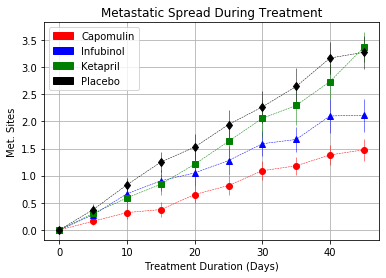

In [122]:
# Generate the Plot (with Error Bars)
for drug,marker,colors in drug_format_list:
    ste = met_standard_errors[drug]
    met_treatment_plt = plt.errorbar(pivot_avg_met_df.index,pivot_avg_met_df[drug],ste,
                                       fmt=marker,ls='--',color=colors,linewidth=0.5)
    
red_patch = mpatches.Patch(color='red', label='Capomulin')
blue_patch = mpatches.Patch(color='blue', label='Infubinol')
green_patch = mpatches.Patch(color='green', label='Ketapril')
black_patch = mpatches.Patch(color='black', label='Placebo')

# Show the Figure
plt.legend(handles=[red_patch, blue_patch,green_patch, black_patch])
plt.title('Metastatic Spread During Treatment')
plt.xlabel('Treatment Duration (Days)')
plt.ylabel('Met. Sites')
plt.grid()

# Save the Figure
plt.savefig(os.path.join('figures','metastic_spread_during_treatment.png'))

![Metastatic Spread During Treatment](../Images/spread.png)

## Survival Rates

In [83]:
# Store the Count of Mice Grouped by Drug and Timepoint (W can pass any metric)
mouse_grouped_df = merge_df.groupby(['Drug','Timepoint'])['Mouse ID']
count_mouse_df = mouse_grouped_df.nunique()
count_mouse_df = pd.DataFrame(count_mouse_df)

# Convert to DataFrame
count_mouse_df.reset_index(inplace=True)
count_mouse_df=count_mouse_df.rename(columns={'Mouse ID':'Mouse Count'})

# Preview DataFrame
count_mouse_df.head()

,Drug,Timepoint,Mouse Count
0,Capomulin,0,25
1,Capomulin,5,25
2,Capomulin,10,25
3,Capomulin,15,24
4,Capomulin,20,23


In [84]:
# Minor Data Munging to Re-Format the Data Frames
pivot_count_mouse_df = count_mouse_df.pivot(index='Timepoint',columns='Drug',values='Mouse Count')

# Preview the Data Frame
pivot_count_mouse_df.head()


Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,25,25,25,25,25,25,25,25,25,25
5,25,21,25,23,23,24,24,25,24,24
10,25,20,21,22,21,24,22,24,22,22
15,24,19,21,19,21,20,16,24,22,21
20,23,18,20,19,20,19,16,23,20,17


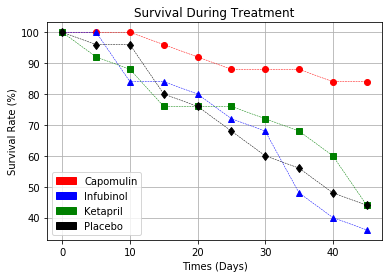

In [123]:
# Generate the Plot (Accounting for percentages)
for drug,marker,colors in drug_format_list:
    total_mouse = pivot_count_mouse_df[drug][0]
    survival_rate = (pivot_count_mouse_df[drug]/total_mouse)*100
    survival_treatment_plt = plt.plot(pivot_count_mouse_df.index,survival_rate,
                                       marker=marker,ls='--',color=colors,linewidth=0.5)

red_patch = mpatches.Patch(color='red', label='Capomulin')
blue_patch = mpatches.Patch(color='blue', label='Infubinol')
green_patch = mpatches.Patch(color='green', label='Ketapril')
black_patch = mpatches.Patch(color='black', label='Placebo')
    
# Show the Figure
plt.legend(handles=[red_patch, blue_patch,green_patch, black_patch])
plt.title('Survival During Treatment')
plt.xlabel('Times (Days)')
plt.ylabel('Survival Rate (%)')
plt.grid()

# Save the Figure
plt.savefig(os.path.join('figures','survival_during_treatment.png'))

![Metastatic Spread During Treatment](../Images/survival.png)

## Summary Bar Graph

In [86]:
# Calculate the percent changes for each drug
percentage_change = (pivot_avg_tumor_df.iloc[-1]/(pivot_avg_tumor_df.iloc[0])-1)*100

# Display the data to confirm
percentage_change

Drug
Capomulin   -19.475303
Ceftamin     42.516492
Infubinol    46.123472
Ketapril     57.028795
Naftisol     53.923347
Placebo      51.297960
Propriva     47.241175
Ramicane    -22.320900
Stelasyn     52.085134
Zoniferol    46.579751
dtype: float64

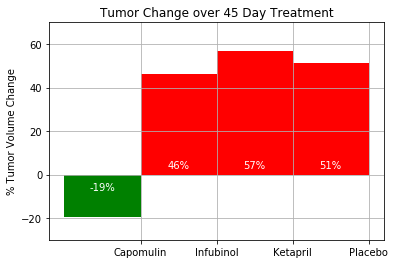

In [87]:

# Splice the data between passing and failing drugs
passing = percentage_change < 0

# Orient widths. Add labels, tick marks, etc. 
drug_list = ['Capomulin','Infubinol','Ketapril','Placebo']
change_list = [(percentage_change[durg])for durg in drug_list]
change_plt = plt.bar(drug_list,change_list,width=-1,align='edge',color=passing.map({True:'g',False:'r'}))
plt.grid()
plt.ylim(-30,70)
plt.ylabel('% Tumor Volume Change')
plt.title('Tumor Change over 45 Day Treatment')

# Use functions to label the percentages of changes
def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        if height > 0:
            label_position = 2
        else:
            label_position = -8
        plt.text(rect.get_x() + rect.get_width()/2., label_position,
                '%d' % int(height)+'%',color='white',
                ha='center', va='bottom')
                
# Call functions to implement the function calls
autolabel(change_plt)

# Save the Figure
plt.savefig(os.path.join('figures','tumor_change_over_45day_treatment.png'))

![Metastatic Spread During Treatment](../Images/change.png)